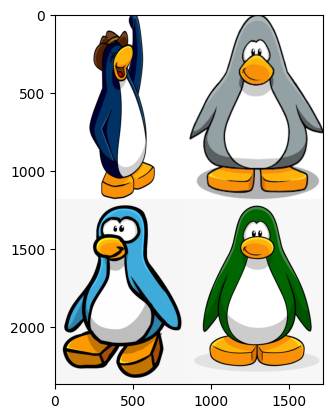

In [33]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

p1 = Image.open('P1.png')
p2 = Image.open('P2.png')
p3 = Image.open('P3.jpg')
p4 = Image.open('P4.png')

img1 = np.array(p1)
img2 = np.array(p2)
img3 = np.array(p3)
img4 = np.array(p4)

height = max(img1.shape[0], img2.shape[0], img3.shape[0], img4.shape[0])
width = max(img1.shape[1], img2.shape[1], img3.shape[1], img4.shape[1])

# Redimensionar as imagens para que todas tenham o mesmo tamanho
p1 = p1.resize((width, height))
p2 = p2.resize((width, height))
p3 = p3.resize((width, height))
p4 = p4.resize((width, height))

combined_width = width * 2
combined_height = height * 2
new_image = Image.new('RGB', (combined_width, combined_height))

new_image.paste(p1, (0, 0))
new_image.paste(p2, (width, 0))
new_image.paste(p3, (0, height))
new_image.paste(p4, (width, height))

plt.imshow(np.array(new_image))
plt.show()

new_image.save('imagem_combinada.png')


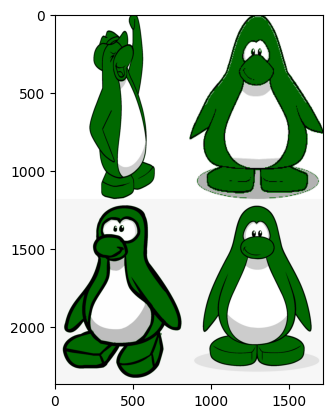

In [34]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

combined_image = Image.open('imagem_combinada.png')

img = np.array(combined_image)

# Criando uma máscara para ignorar o fundo e os traços pretos
mask = np.all(img > [177, 177, 177], axis=-1)
black_mask = np.all(img < [30, 30, 30], axis=-1)

# Aplicando uma nova cor nos pinguins
color = [0, 105, 0]  # Verde
new_image = img.copy()
new_image[~mask & ~black_mask] = color

new_image = Image.fromarray(new_image)

plt.imshow(np.array(new_image))

new_image.save('cor_trocada.png')


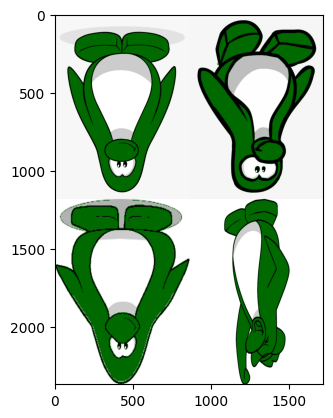

In [35]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

combined_image = Image.open('cor_trocada.png')

img = np.array(combined_image)

def reverse_x(img):
    img_copy = np.zeros(shape=img.shape, dtype=np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img_copy[i, j] = img[i, img.shape[1] - j - 1]
    return img_copy

def reverse_y(img):
    img_copy = np.zeros(shape=img.shape, dtype=np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img_copy[i, j] = img[img.shape[0] - i - 1, j]
    return img_copy

def mirror(img, apply_reverse_x=False, apply_reverse_y=False):

    if apply_reverse_x:
        img = reverse_x(img)
    if apply_reverse_y:
        img = reverse_y(img)
    
    # Plot image
    plt.imshow(img)
    return img

reversed_image = mirror(img, apply_reverse_x=True, apply_reverse_y=True)
# make image from array
reversed_image = Image.fromarray(reversed_image)
reversed_image.save('imagem_refletida.png')



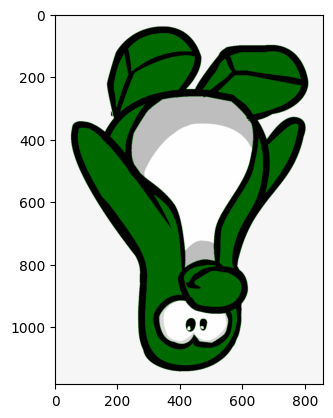

In [36]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

combined_image = Image.open('imagem_refletida.png')

img = np.array(combined_image)

#get image dimensions
height, width, _ = img.shape

height_h = height // 2
width_h = width // 2

second_quarter = img[0:height_h, width_h:width]

new_img = Image.fromarray(second_quarter)

plt.imshow(new_img)
new_img.save('pinguim_recortado.png')


Valor do threshold escolhido: 128
Justificativa:
Um threshold de 128 é escolhido porque é o ponto médio da escala de cinza (0-255).
Esse valor pode ajudar a separar os pinguins do fundo, assumindo que eles estão mais escuros em comparação com o fundo.
Ao aplicar esse threshold, pixels com intensidade abaixo de 128 serão considerados como parte do pinguim (ou como objeto),
enquanto pixels com intensidade acima serão considerados como fundo.


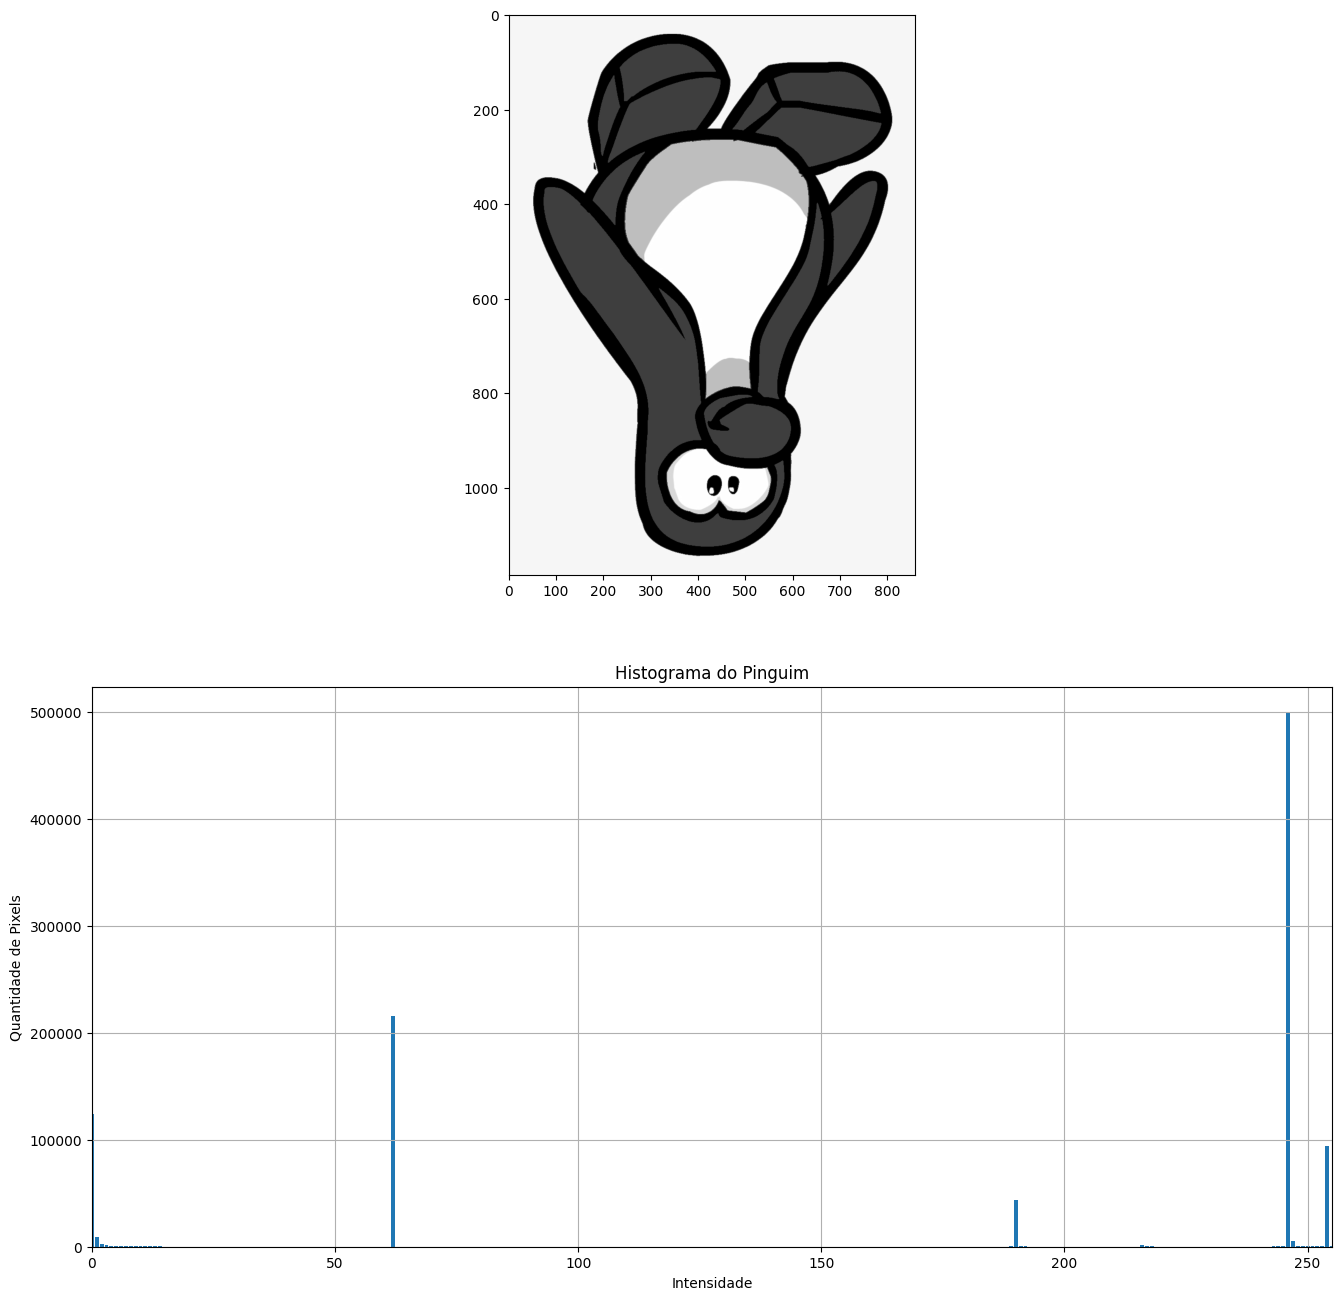

In [37]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Funções para calcular e mostrar o histograma
def histogram_gray(img):
    (l, c) = img.shape
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            intensity = img[i, j]
            histogram[intensity] += 1
            
    return histogram

def show_histogram_gray(img):
    histogram = histogram_gray(img)
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram)
    plt.title('Histograma do Pinguim')
    plt.xlabel('Intensidade')
    plt.ylabel('Quantidade de Pixels')
    plt.xlim(0, 255)
    plt.grid()

pin_image = Image.open('pinguim_recortado.png') 
img = np.array(pin_image.convert('L'))  # Converter para escala de cinza

show_histogram_gray(img)

threshold = 128  # Este é um valor comum para a separação entre fundo e objeto em imagens de escala de cinza.

print(f'Valor do threshold escolhido: {threshold}')
print('Justificativa:')
print('Um threshold de 128 é escolhido porque é o ponto médio da escala de cinza (0-255).')
print('Esse valor pode ajudar a separar os pinguins do fundo, assumindo que eles estão mais escuros em comparação com o fundo.')
print('Ao aplicar esse threshold, pixels com intensidade abaixo de 128 serão considerados como parte do pinguim (ou como objeto),')
print('enquanto pixels com intensidade acima serão considerados como fundo.')



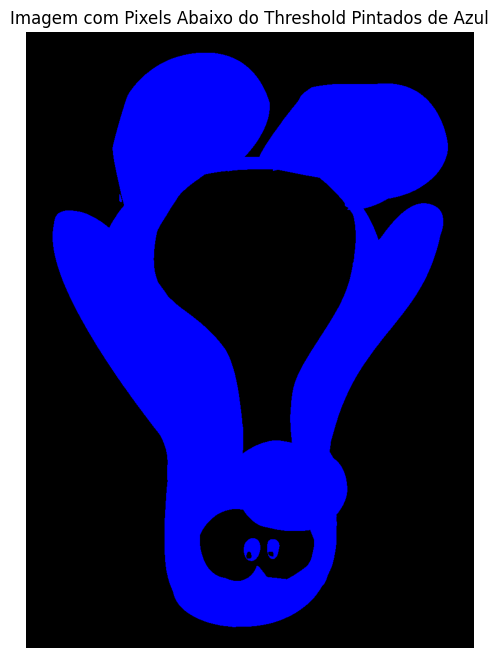

In [41]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

pin_image = Image.open('pinguim_recortado.png') 
img = np.array(pin_image.convert('L'))  # Converter para escala de cinza

threshold = 128  # Valor de threshold

# Criar uma nova imagem colorida com a cor favorita (azul)
color_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

# Pintar os pixels abaixo do threshold com a cor azul
blue_color = [0, 0, 255]  # Azul em formato RGB
color_image[img < threshold] = blue_color  # Aplica a cor azul aos pixels abaixo do threshold

colored_image = Image.fromarray(color_image)

plt.figure(figsize=(8, 8))
plt.imshow(colored_image)
plt.axis('off')  # Remove os eixos
plt.title('Imagem com Pixels Abaixo do Threshold Pintados de Azul')
plt.show()

colored_image.save('pinguim_colorido.png')
